In [20]:
import os 
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

### Data Processing

In [21]:
path = 'data/train/'
data = []  # Initialize list to hold image data
labels = []  # Initialize list to hold labels

count = 0 
# loading and setting up my training images
for filename in os.listdir(path):
    count += 1
    # Check if the file is an image (you can add more image extensions if needed)
    # Takes 6000 images out of 25000
    if filename.endswith('.jpg') and (count < 3000 or (count > 12500 and count < 15500)):
        img = cv2.imread(os.path.join(path, filename))
        img = (cv2.resize(img, (150, 110))).flatten()
        img = img/255
        data.append(img)  # Append each flattened image to the list
        if filename.startswith('dog'):
            labels.append(1)
        else:
            labels.append(0)

In [22]:
# Convert lists to NumPy arrays
data = np.array(data)
labels = np.array(labels)

In [23]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True)

### Model Training

In [24]:
# Performed grid search to find this combination of gamma and C to get the best accuracy
# takes a LONG TIME!
clf = SVC(kernel='rbf', random_state=42, gamma =0.0001, C=10)
clf.fit(X_train, y_train)

SVC(C=10, gamma=0.0001, random_state=42)

### Model Evaluation

In [26]:
y_pred = clf.predict(X_test)

In [27]:
print(f'Accuracy score: {accuracy_score(y_pred,y_test)}%')

Accuracy score: 0.6616666666666666%


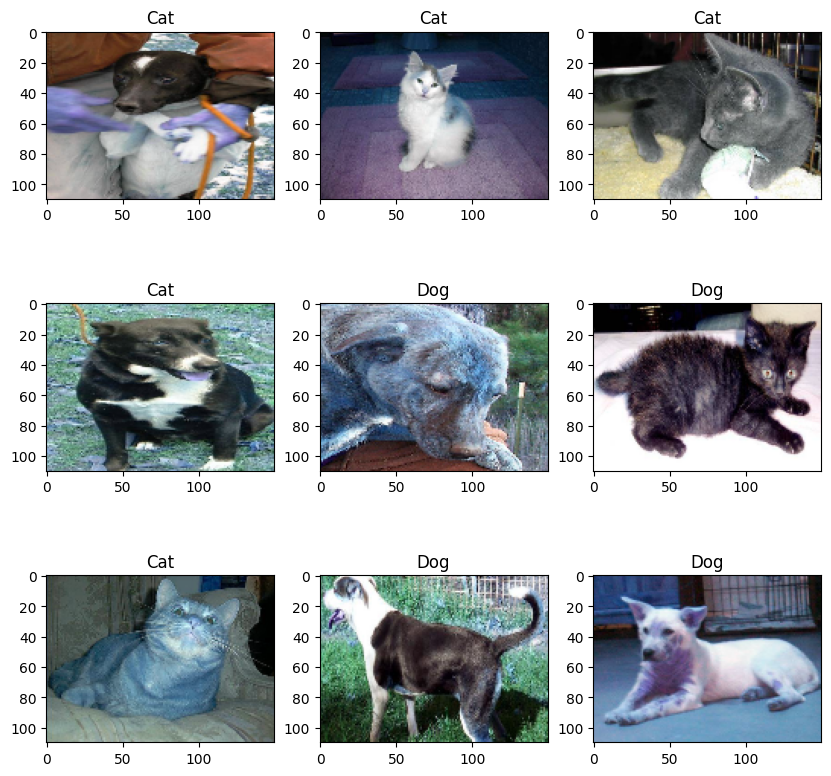

In [31]:
## Visualise predictions ( 6 out of 9 correct predicitions )
path = 'data/test1/'
count = 0

def processImg(img):
    img = img.flatten()
    return img/255

plt.figure(figsize=(10,10))
for filename in os.listdir(path):
    count += 1
    img = cv2.imread(os.path.join(path, filename))
    img = (cv2.resize(img, (150, 110)))
    plt.subplot(3,3,count)
    plt.imshow(img)
    plt.title("Dog" if clf.predict([processImg(img)]) == 1 else "Cat")
    if count == 9:
        break